#### All modifications - repeat 10 times

This experiment involves the default setup for all the parameters on GlusterFS (IARAI server local non-scratch local storage), however with the reduced dataset size to 35000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 

In [1]:
from benchmarking.analysis.analyze_results import *

Data loading function:

In [2]:
# def load_all_experiments(output_base_folder, base_folder):
#     results_gluster = []
#     for folder_index in range(1, 11):
#         print(f"Working with {folder_index}")
#         gluster_folder_filter= base_folder + str(folder_index) + "/*benchmark_e2e*"

#         # read data
#         df_dataloader_gluster = extract_timelines(output_base_folder, folder_filter=gluster_folder_filter)

#         # Get unique functions 
#         unique_functions_gluster = np.unique(df_dataloader_gluster["item_x"])
#         print(f"Unique functions: {unique_functions_gluster}")

#         unique_runs_gluster = np.unique(df_dataloader_gluster["run"])

#         # extract GPU UTIL
#         df_gpuutil_gluster = extract_gpuutil(output_base_folder, folder_filter=gluster_folder_filter)
#         unique_runs_gluster = np.unique(df_dataloader_gluster["run"])

#         # Get data for gluster
#         returns_gluster = []
#         for run in sorted(unique_runs_gluster):
#             df = df_dataloader_gluster[df_dataloader_gluster["run"]==run]
#             dfgpu = df_gpuutil_gluster[df_gpuutil_gluster["run"]==run]
#             returns_gluster.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
#         result = pd.DataFrame.from_records(data=returns_gluster)
#         result["throughput"] = samples / (result["runtime"] / epochs)
#         results_gluster.append(result)
#     return results_gluster
def load_all_experiments(output_base_folder, base_folder, experiments_num, data_folder, subfolder):
    results_data = []
    for folder_index in range(1, experiments_num):
        print(f"Working with {folder_index}")
        data_folder_filter= base_folder + str(folder_index) + data_folder

        # read data
        df_dataloader = extract_timelines(output_base_folder, folder_filter=data_folder_filter)

        # Get unique functions 
        unique_functions = np.unique(df_dataloader["item_x"])
        print(f"Unique functions: {unique_functions}")
        unique_runs = np.unique(df_dataloader["run"])
        
        # extract GPU UTIL
        df_gpuutil = extract_gpuutil(output_base_folder, folder_filter=data_folder_filter)

        # Get data
        returns_data = []
        for run in sorted(unique_runs):
            ds, _, epochs, samples, _, _ = get_metadata_info(output_base_folder / Path(base_folder+str(folder_index)+f"/{subfolder}/"+run))
            df = df_dataloader[df_dataloader["run"]==run]
            dfgpu = df_gpuutil[df_gpuutil["run"]==run]
            df = df.drop_duplicates(subset="id", keep="first", inplace=False)
            _, _, colors, lanes = get_colors_runs_and_lanes(df)
            r = show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, False, False, 2, skip_plot=True)
            r["run"]=run
            returns_data.append(r)        

        df_full = extract_pandas(output_base_folder, folder_filter=data_folder_filter)
        r = pd.DataFrame.from_records(data=returns_data)
        r = get_throughput(r, base_folder+str(folder_index)+f"/{subfolder}/", df_full, unique_runs, output_base_folder)
        results_data.append(r)
        
    return results_data

In [3]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch", "lightning"]

In [4]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### slim-2 GlusterFS

In [5]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1701glusterfs_long-temp")
base_folder = "glusterfs_long_"

# Load data
# results_gluster = load_all_experiments(output_base_folder, base_folder)
results_ceph = load_all_experiments(output_base_folder, base_folder, 11, "/*benchmark_e2e*", "")

Working with 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:11<00:00, 180.38it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:01<00:00, 1562.62it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [07:55<00:00,  4.42it/s]


Working with 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2087/2087 [00:12<00:00, 163.37it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2087/2087 [00:01<00:00, 1347.11it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2087/2087 [08:08<00:00,  4.28it/s]


Working with 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2095/2095 [00:12<00:00, 168.88it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2095/2095 [00:01<00:00, 1346.17it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2095/2095 [08:11<00:00,  4.26it/s]


Working with 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2089/2089 [00:12<00:00, 164.89it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2089/2089 [00:02<00:00, 1007.93it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2089/2089 [09:07<00:00,  3.82it/s]


Working with 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2096/2096 [00:11<00:00, 175.37it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2096/2096 [00:01<00:00, 1085.91it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2096/2096 [08:32<00:00,  4.09it/s]


Working with 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:12<00:00, 164.83it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:01<00:00, 1542.09it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [08:27<00:00,  4.14it/s]


Working with 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2101/2101 [00:12<00:00, 170.06it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2101/2101 [00:01<00:00, 1166.96it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2101/2101 [08:26<00:00,  4.15it/s]


Working with 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2094/2094 [00:13<00:00, 160.04it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2094/2094 [00:02<00:00, 1032.66it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2094/2094 [08:30<00:00,  4.10it/s]


Working with 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:11<00:00, 176.09it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:01<00:00, 1241.30it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [08:31<00:00,  4.11it/s]


Working with 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:12<00:00, 174.77it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:01<00:00, 1276.94it/s]


Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False
Dataset:  35000
Batch size: 256
Epochs:  100
Images total:  3500000
Batches per epoch 137
Images total (rounded):  3507200
timestamp False


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [08:36<00:00,  4.06it/s]


In [6]:
# Check the sizes
results_gluster = results_ceph
print(f"Experiments loaded ... Gluster: {len(results_gluster)}")

Experiments loaded ... Gluster: 10


In [7]:
throughput_all_gluster = plot_all_histograms(results_gluster, impls, libs, False) # display = False (doesn't plot histogrms)

In [8]:
df_t_gluster = add_stats(throughput_all_gluster)
df_t_gluster

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,900.48,908.00,957.45,910.19,911.13,908.61,911.00,912.55,915.00,897.58,913.20,270.42,16.44
threaded_lightning,598.15,599.82,600.15,613.70,603.85,602.64,600.58,591.45,606.94,594.11,601.14,39.59,6.29
asyncio_torch,886.44,899.39,909.95,949.63,911.01,945.47,912.44,898.34,902.25,890.03,910.50,455.07,21.33
asyncio_lightning,574.03,593.38,604.68,612.42,608.05,603.15,598.15,595.28,596.46,603.29,598.89,111.76,10.57
vanilla_torch,360.32,532.52,537.28,329.29,532.64,536.75,371.98,532.80,500.26,425.10,465.89,7217.61,84.96
vanilla_lightning,132.78,139.82,143.78,130.95,104.84,144.36,104.64,100.80,110.67,107.57,122.02,318.90,17.86


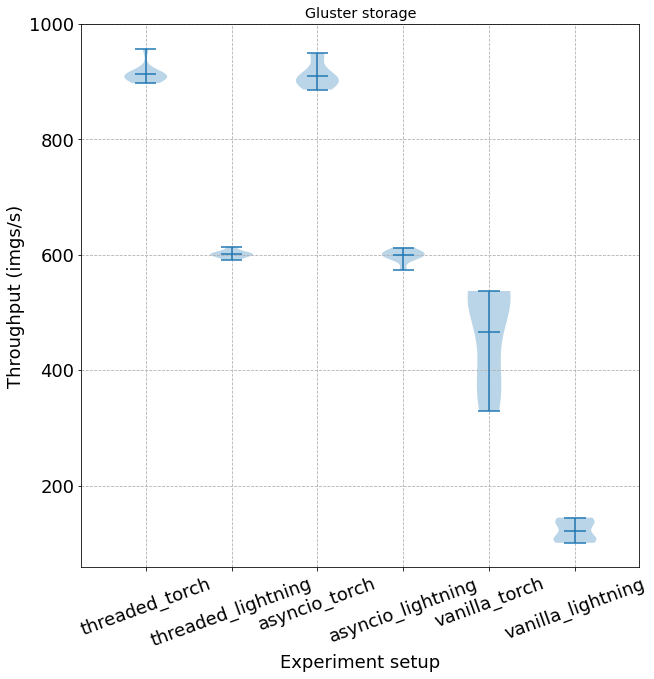

In [9]:
plot_violins(df_t_gluster, "Gluster storage") # 

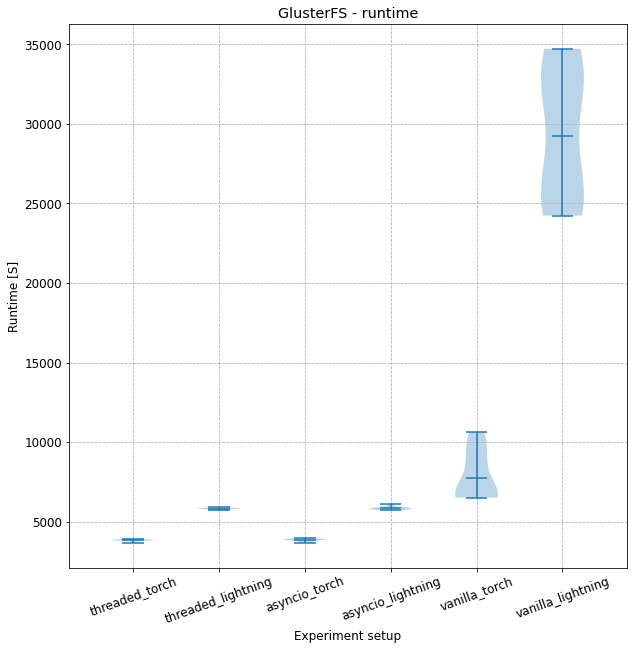

In [10]:
runtime_all_gluster = plot_all_histograms(results_gluster, impls, libs, False, value="runtime") # display = False (doesn't plot histogrms)
plot_violins(add_stats(runtime_all_gluster), "GlusterFS - runtime", "Runtime [S]")

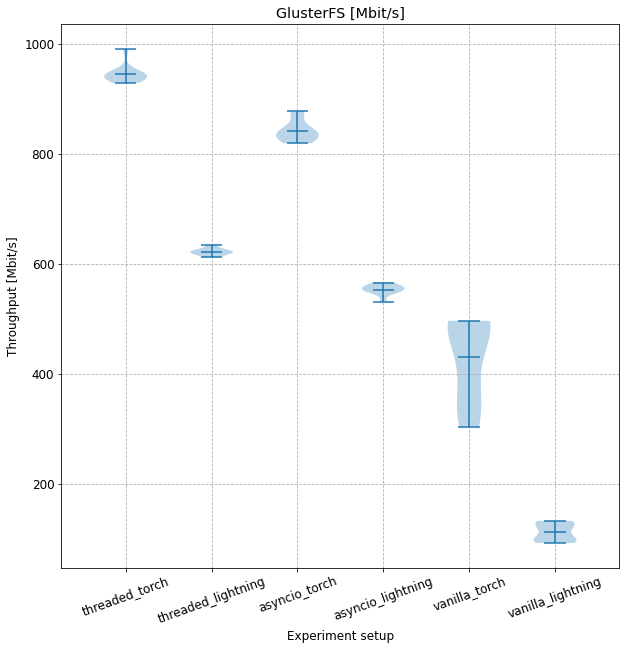

In [15]:
runtime_all_gluster = plot_all_histograms(results_gluster, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
plot_violins(add_stats(runtime_all_gluster), "GlusterFS [Mbit/s]", "Throughput [Mbit/s]")

In [16]:
# Throughput in Mbit/s
throughput_all_gluster = plot_all_histograms(results_gluster, impls, libs, False, value="Mbit/s") # display = False (doesn't plot histogrms)
df_t_gluster = add_stats(throughput_all_gluster)
df_t_gluster

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,932.21,939.99,991.18,942.26,943.23,940.62,943.10,944.70,947.23,929.20,945.37,289.78,17.02
threaded_lightning,619.23,620.95,621.30,635.32,625.12,623.87,621.74,612.29,628.32,615.05,622.32,42.39,6.51
asyncio_torch,819.79,831.76,841.54,878.23,842.52,874.38,843.83,830.80,834.41,823.11,842.04,389.21,19.73
asyncio_lightning,530.87,548.77,559.22,566.38,562.34,557.80,553.17,550.53,551.61,557.93,553.86,95.62,9.78
vanilla_torch,333.23,492.48,496.88,304.53,492.59,496.40,344.01,492.74,462.65,393.14,430.86,6173.12,78.57
vanilla_lightning,122.79,129.30,132.97,121.10,96.96,133.51,96.78,93.22,102.35,99.48,112.85,272.69,16.51
